In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
import importlib
from IPython import display
from lib import util
import learn_util
from copy import deepcopy
import os
from lib import vehicleclass as v
%matplotlib inline
from lib import frame_util as futil
importlib.reload(futil)
importlib.reload(v)

<module 'lib.vehicleclass' from 'C:\\Users\\Alex Lin\\Documents\\CS229\\Project\\cs229_merging\\lib\\vehicleclass.py'>

In [ ]:
vidDict = futil.LoadDictFromTxt("res/101_trajectories/aug_trajectories-0750am-0805am.txt", 'vid')

In [4]:
start = time.time()
frameDict = futil.LoadDictFromTxt("res/101_trajectories/aug_trajectories-0750am-0805am.txt", 'frame')
end = time.time()
print("Loading took ", end - start , " seconds.")

Loading took  22.243069887161255  seconds.


In [4]:
grids = futil.GetGridsFromFrameDict(frameDict)

In [ ]:
print(len(grids))
futil.AnimateFrames(frameDict)

In [ ]:
#[VID, FID, totalF, globaltime, localX, localY, globalX, globalY, \
#vehicleLength, vehicleWidth, vehicleClass, vVelocity, vAccel, laneID\
#precedingVID, followingVID, spacingFt, headwayFt]

In [ ]:
#With a loaded frameDict, animates frames.
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.figure(1)

for i in range(int(len(frameDict)/2)):
    curFrame = frameDict[100 + i*5]
    plotFrame(curFrame)
    plt.clf()


    

In [ ]:
def plotFrame(curFrame):
    x,y = getFramePoints(curFrame)    
    plt.plot(y,70 - x, 'ro')
    plt.title("t = " + str(i))
    plt.axis([0, 2250, 0, 70])
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #plt.show()


In [ ]:
def getFramePoints(curFrame):
    x = np.array([0]*len(curFrame))
    y = np.array([0]*len(curFrame))
    entryCounter = 0
    for entry in curFrame:
        x[entryCounter] = float(curFrame[entry][4])
        y[entryCounter] = float(curFrame[entry][5])
        entryCounter += 1
    return x,y

In [ ]:
from lib import vehicleclass as v
import importlib
importlib.reload(v)

In [ ]:
MAX_X = 70
MAX_Y = 2250
X_DIV = 35
Y_DIV = 200
X_STEP = float(MAX_X/X_DIV)
Y_STEP = float(MAX_Y/Y_DIV)
def FrameToGrid(frame):
    #features = x, y, vx, vy, ax, ay
    grid = np.zeros((X_DIV + 2, Y_DIV + 2, 6))
    for vid in frame:
        vehicleData = frame[vid]
        veh = v.vehicle(vehicleData)
        gridX = int(veh.getX() / X_STEP)
        gridY = int(veh.getY() / Y_STEP)
        #print(veh.getX(), gridX, veh.getY(), gridY)
        grid[gridX][gridY] = veh.getTrajectory()
        #print(gridX, gridY)
    return grid

In [ ]:
from lib import vehicleclass as v

importlib.reload(v)
g = FrameToGrid(frameDict[150])

print(g.shape)
print(g)


In [ ]:
def GetGridsFromFrameDict(frameDict):
    gridDict = {}
    for i in frameDict:
        frame = frameDict[i]
        grid = FrameToGrid(frame)
        gridDict[i] = deepcopy(grid)
    return gridDict

In [ ]:
print(frameDict[13])

In [ ]:
gd = GetGridsFromFrameDict(frameDict)

In [ ]:
print(len(gd))

In [ ]:
#print(gd[150])
print(np.sum(gd[150]))
print(gd[150].shape)

In [ ]:
plotFrame(frameDict[150])

In [ ]:
gflat = np.sum(gd[150], axis=2)

In [ ]:
print(gflat.shape)

In [ ]:
gflat[gflat != 0]

In [ ]:
gflat = np.sum(grid, axis=2)
nz = np.nonzero(gflat)
nzx = nz[0]*X_STEP
nzy = nz[1]*Y_STEP
plt.axis([0, 2250, -70, 0])
plt.plot(nzy, -nzx, 'ro')
plt.show()


In [ ]:
plotFrame(frameDict[150])

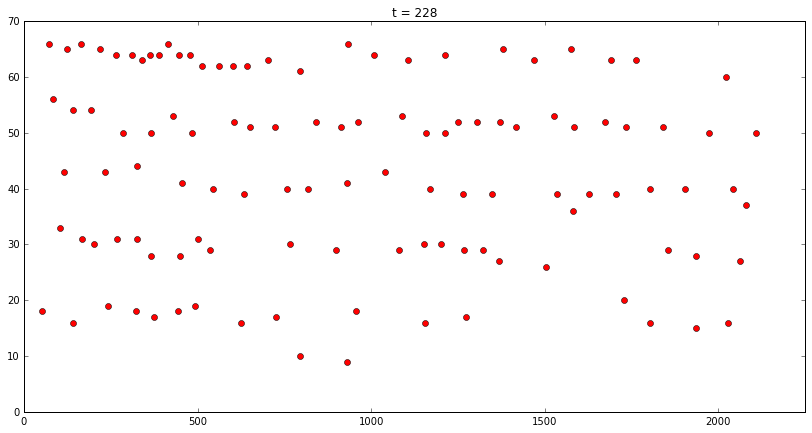

KeyboardInterrupt: 

In [ ]:
from lib import frame_util as futil
importlib.reload(futil)
futil.AnimateFrames(frameDict)

In [25]:
def visualizePredictions(predFilename, actualFilename):
    predFile = open(predFilename)
    predLines = predFile.readlines()
    predArray = np.array(predLines).astype(float)
    predFile.close()
    actualFile = open(actualFilename)
    actualLines = actualFile.readlines()
    actualArray = np.array(actualLines).astype(float)
    actualFile.close()
    x_axis = np.array(range(len(predArray)))
    return x_axis, predArray, actualArray
    
    

In [57]:
actualFilename = "res/101_trajectories/trajectories-0750am-0805am-ytest.txt"
predFilename = "res/101_trajectories/trajectories-0750am-0805am-PREDICTIONS-Linmodel.txt"
x, pred, actual = visualizePredictions(predFilename, actualFilename)

In [58]:
print(x, pred, actual)

[   0    1    2 ..., 8633 8634 8635] [ 64.08780853  64.72117394  61.13068741 ...,  49.52816503  49.95401619
  49.56981191] [ 68.463  68.218  67.936 ...,  40.162  40.353  40.782]


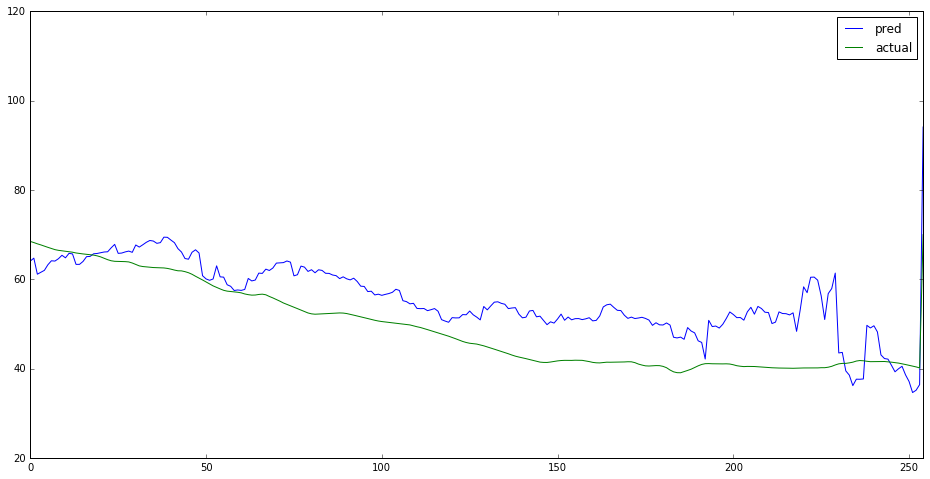

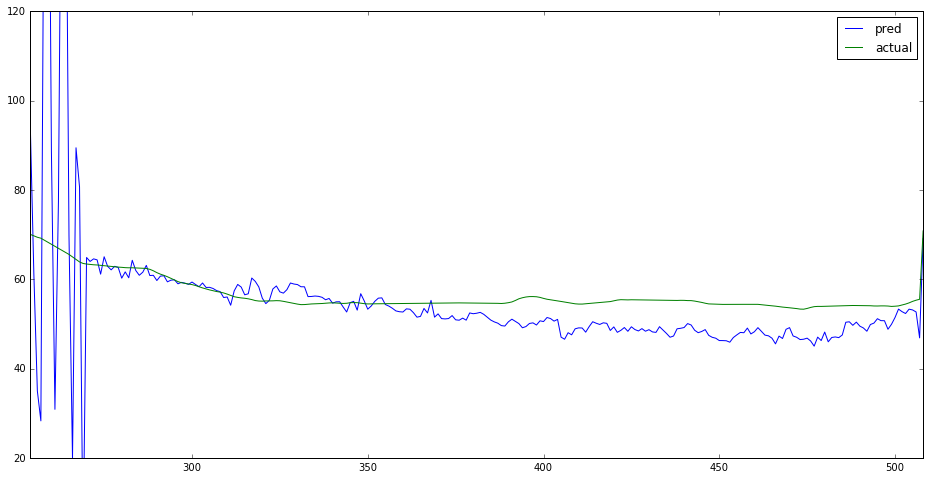

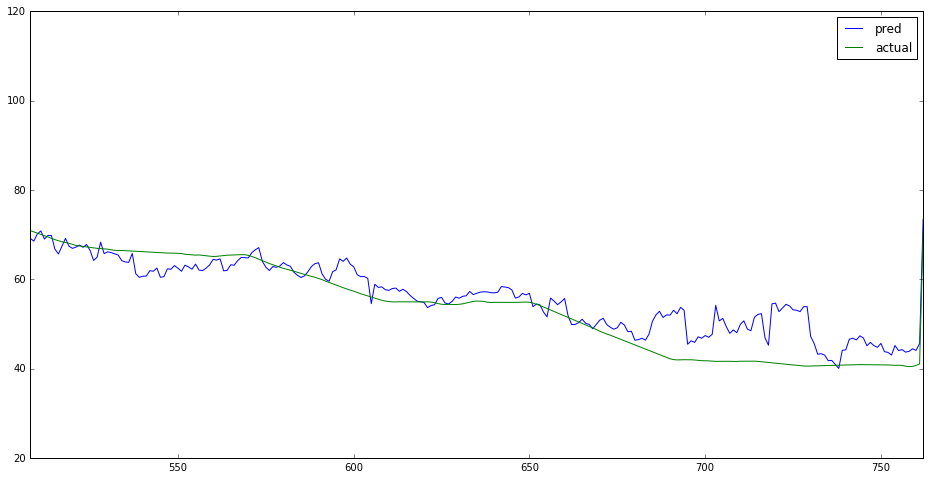

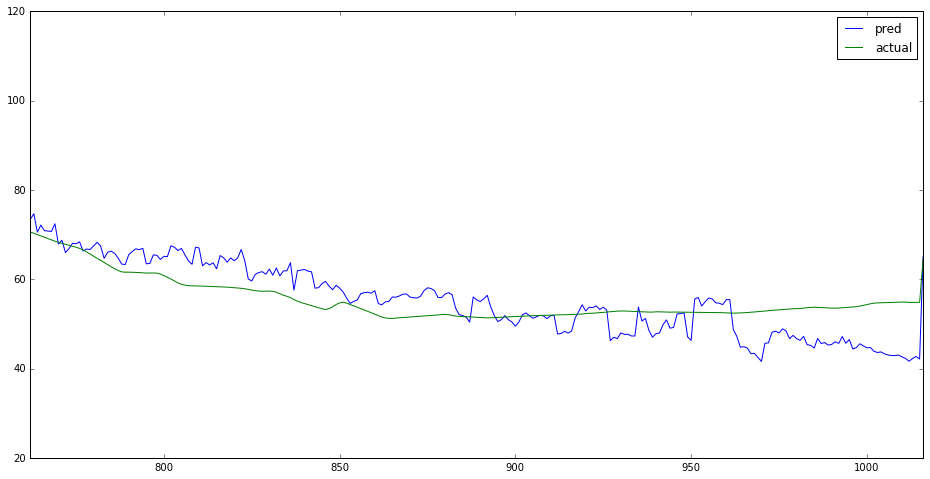

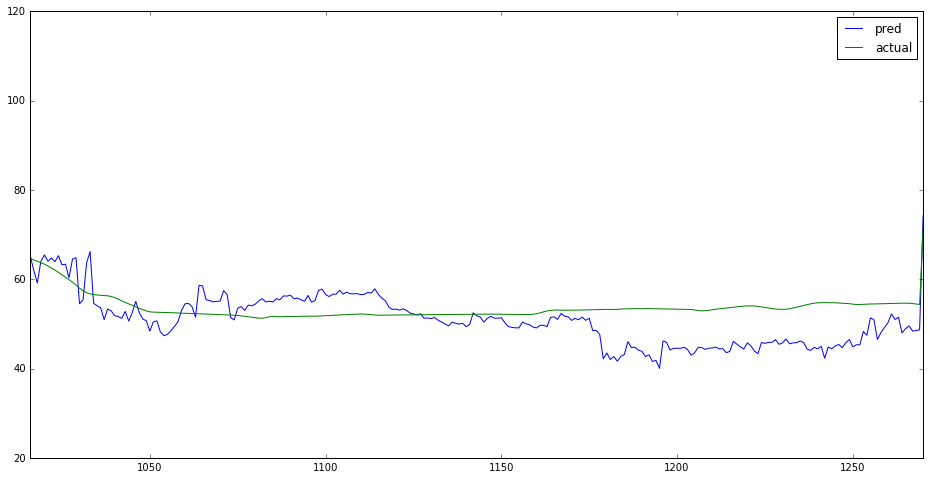

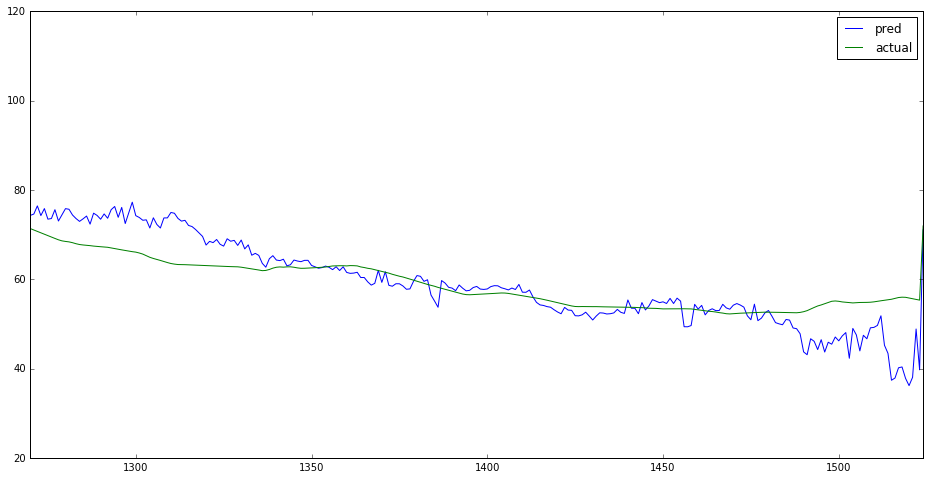

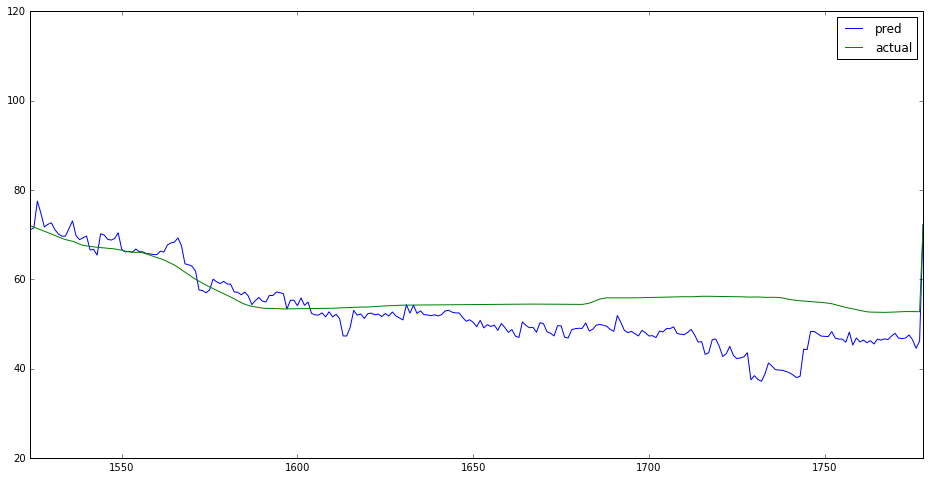

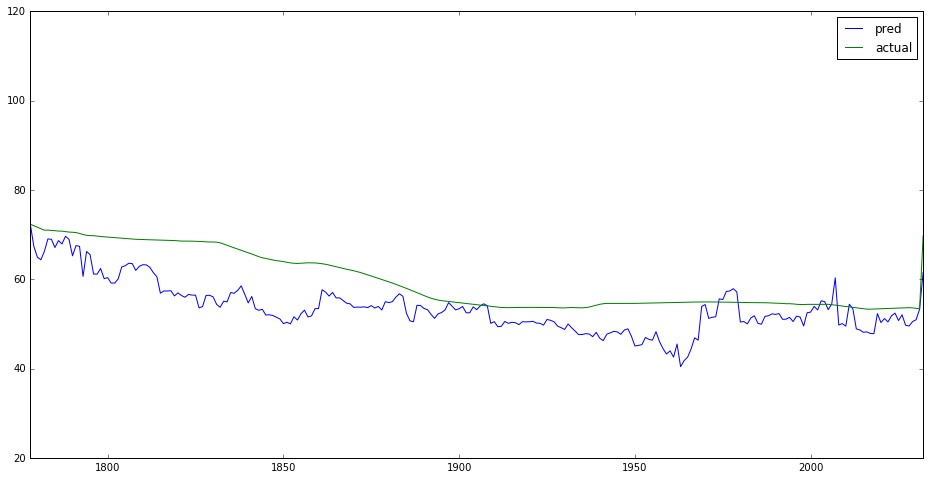

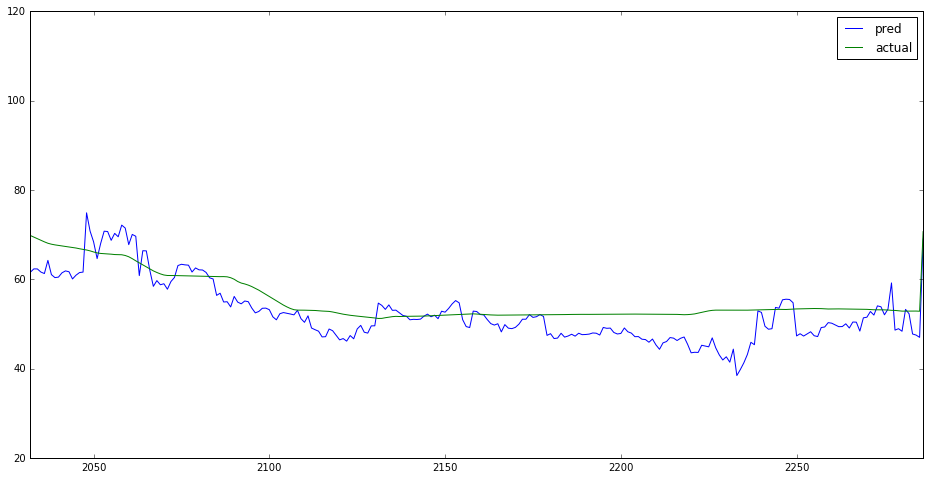

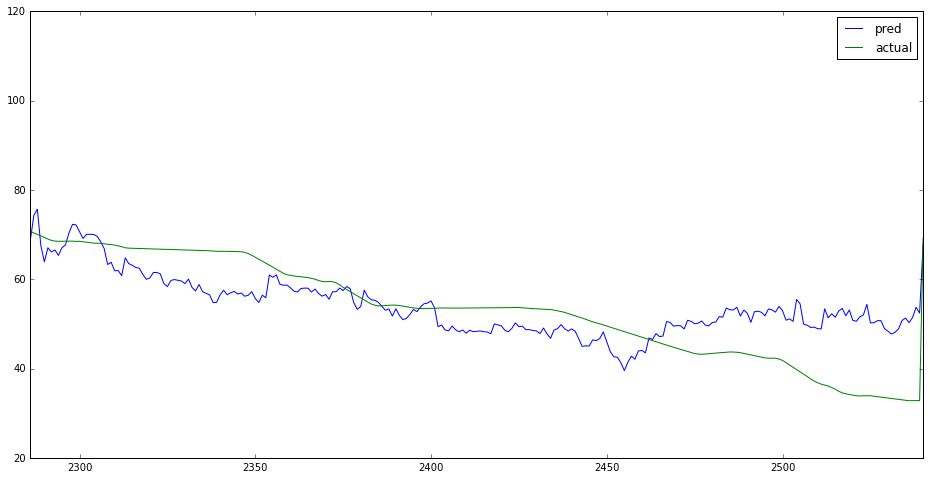

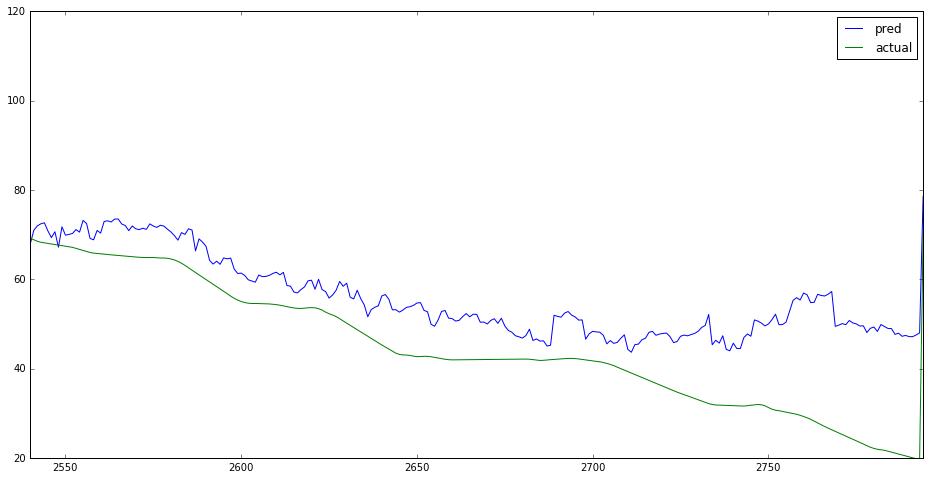

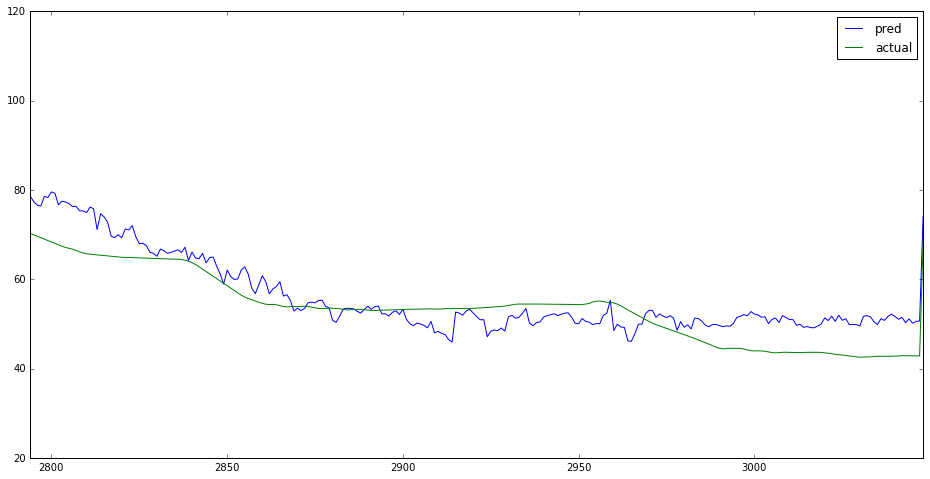

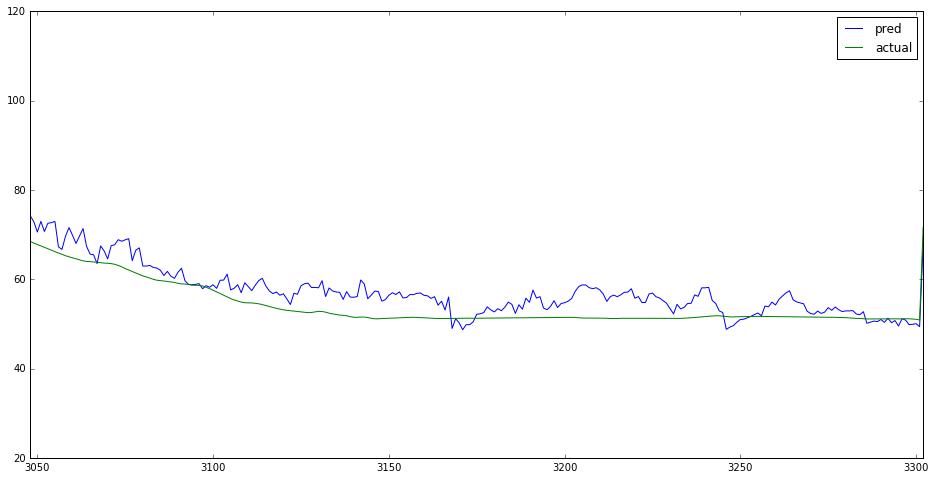

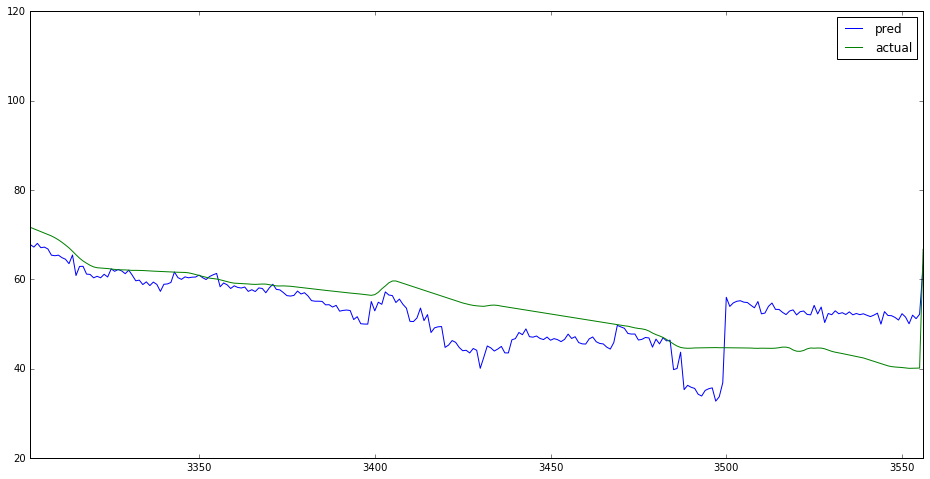

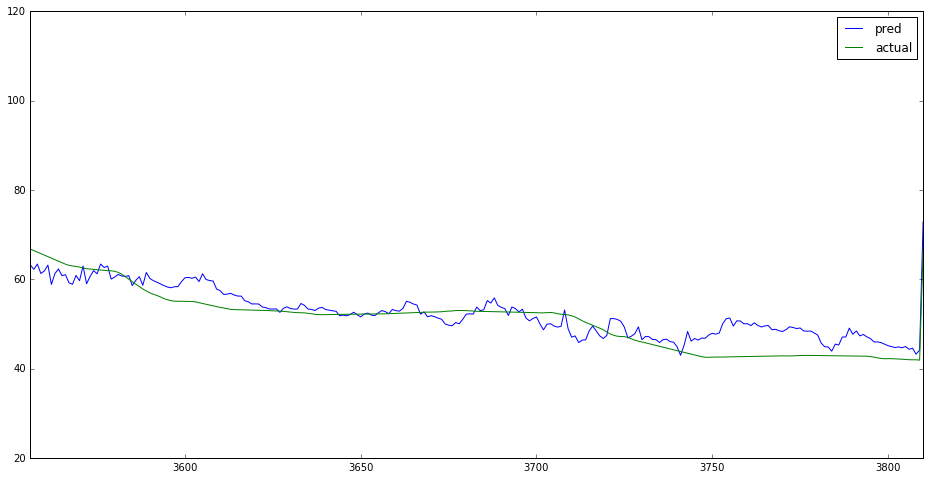

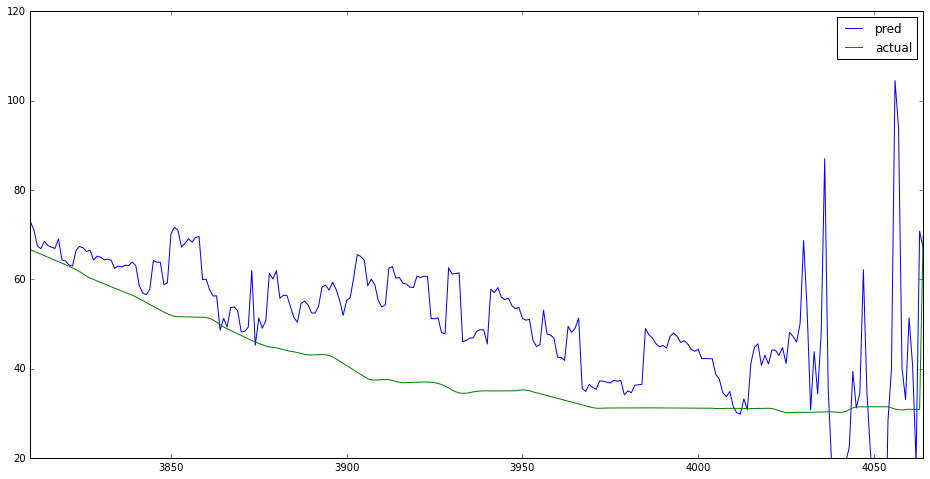

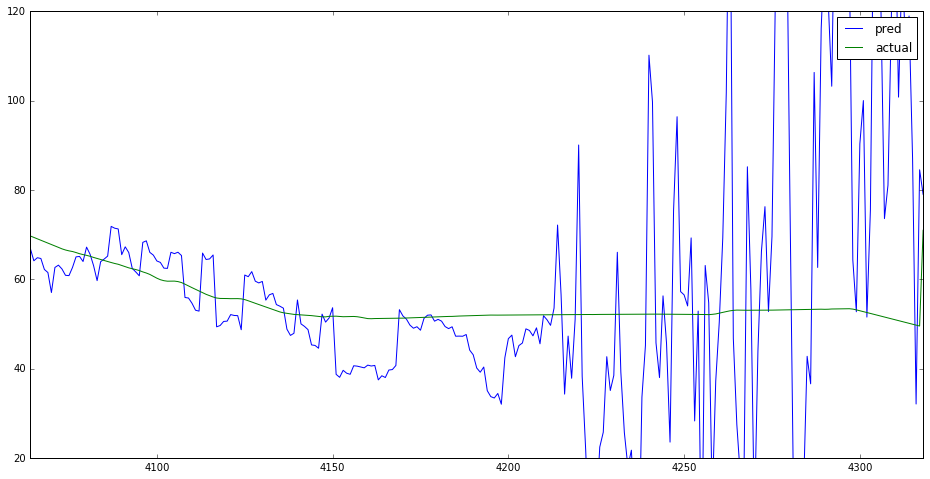

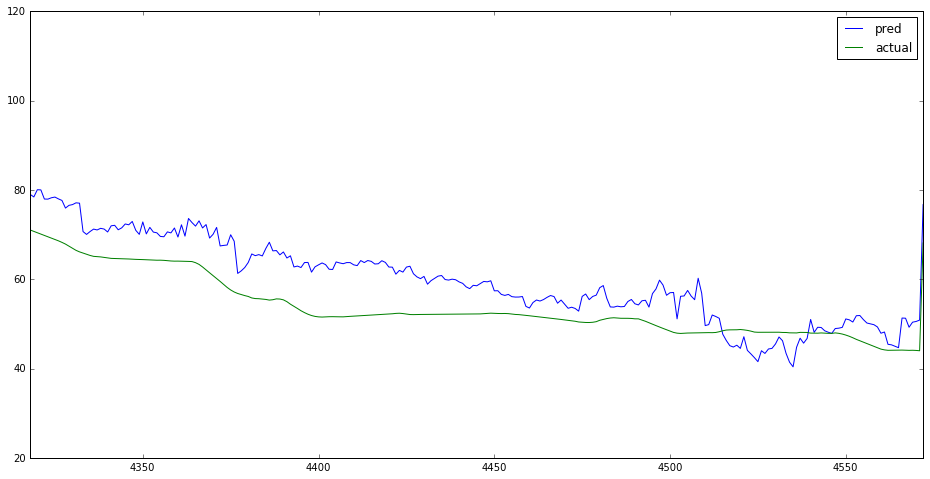

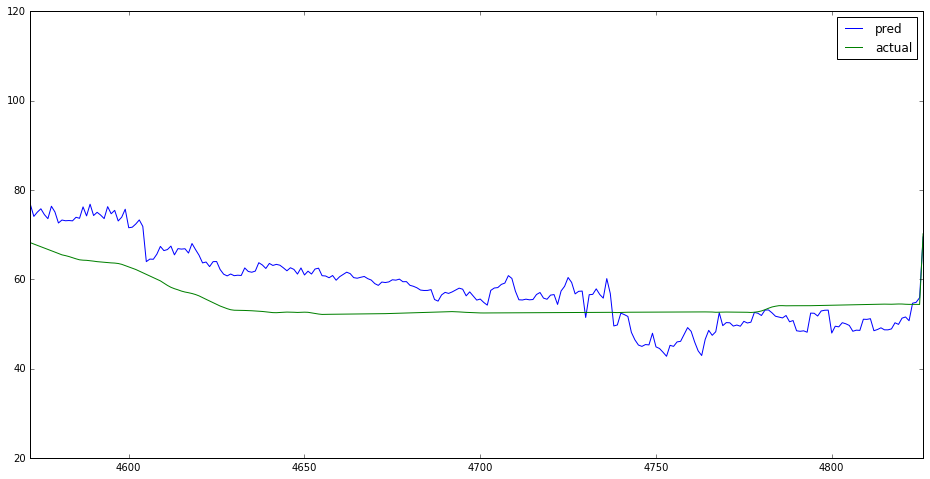

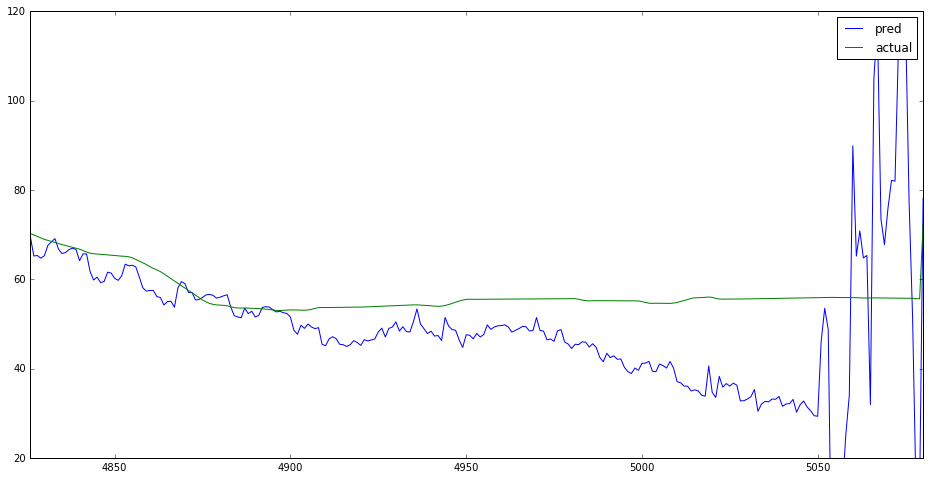

In [66]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

for trial in range(0,20):
    plt.plot(x, pred, label='pred')
    plt.plot(x, actual, label='actual')
    plt.legend()
    plt.axis([254*trial, 254*(trial+1), 20, 120])
    plt.show()

In [ ]:
start = time.time()
filename="res/101_trajectories/aug_trajectories-0750am-0805am.txt"
trainIDs, testIDs = learn_util.makeTrainTestData(filename, .75)
end = time.time()
print("Making test + train took ", end - start , " seconds.")

start = time.time()
path = os.getcwd()+'/'
frameDict = futil.LoadDictFromTxt(path+filename, 'frame')
end = time.time()
print("Loading frame dict ", end - start , " seconds.")

start = time.time()
dictOfGrids = futil.GetGridsFromFrameDict(frameDict)
end = time.time()
print("Making dict of grids took ", end - start , " seconds.")
print("Adfsa")
# filepath = makePathMR(filename, '-mergerMinRanges')
# MR = np.loadtxt(filepath, dtype='int')

Making test + train took  0.0030045509338378906  seconds.
Loading frame dict  21.389418125152588  seconds.
Processed  500  frames.


In [58]:
start = time.time()
filename="res/101_trajectories/aug_trajectories-0750am-0805am.txt"
trainIDs, testIDs = learn_util.makeTrainTestData(filename, .75)
end = time.time()
print("Making test + train took ", end - start , " seconds.")

start = time.time()
path = os.getcwd()+'/'
frameDict = futil.LoadDictFromTxt(path+filename, 'frame')
end = time.time()
print("Loading frame dict ", end - start , " seconds.")

start = time.time()
dictOfGrids = futil.GetGridsFromFrameDict(frameDict)
end = time.time()
print("Making dict of grids took ", end - start , " seconds.")
print("Adfsa")
# filepath = makePathMR(filename, '-mergerMinRanges')
# MR = np.loadtxt(filepath, dtype='int')

Making test + train took  0.0030040740966796875  seconds.
Loading frame dict  23.323601722717285  seconds.
Making dict of grids took  11.569149255752563  seconds.
Adfsa


In [57]:
origGrid = dictOfGrids[19]
print("OrigGridShape = ", origGrid)
sum1 = np.sum(origGrid,1)
print("sum1 = ", sum1.shape)
sum2 = np.sum(sum1, 0)
numVehicles = sum2[0]
means = sum2 / numVehicles
print(sum2)
means[0] = 0
print(means)
for i in origGrid.shape[0]:
    for j in origGrid.shape[1]:
        if origGrid[i][j][0] != 0:
            origGrid[i][j] -= means
print("OrigGridShape = ", origGrid)


OrigGridShape =  [[[ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  ..., 
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]]

 [[ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  ..., 
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]]

 [[ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  ..., 
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]]

 ..., 
 [[ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  ..., 
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]]

 [[ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  ..., 
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]]

 [[ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  ..., 
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]
  [ 0.     0.195 -0.2  ]]]
sum1 =  (32, 3)


TypeError: 'int' object is not iterable

In [53]:
sum1 = np.sum(origGrid,1)
print("sum1 = ", sum1.shape)
sum2 = np.sum(sum1, 0)
numVehicles = sum2[0]
means = sum2 / numVehicles
print(sum2)
means[0] = 0
print(means)
origGrid -= means
print("OrigGridShape = ", origGrid)


sum1 =  (32, 3)
[   2.    386.49 -396.4 ]
[   0.     193.245 -198.2  ]
OrigGridShape =  [[[   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  ..., 
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]]

 [[   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  ..., 
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]]

 [[   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  ..., 
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]]

 ..., 
 [[   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  ..., 
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]]

 [[   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  ..., 
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]
  [   0.   -193.05  198.  ]]

 [[   0.   -193

In [4]:
filenames = ["res/101_trajectories/aug_trajectories-0750am-0805am.txt", 
             "res/101_trajectories/aug_trajectories-0805am-0820am.txt", 
             "res/101_trajectories/aug_trajectories-0820am-0835am.txt"]

outfile = open("res/101_trajectories/101_full_trajectories_compressed.txt", 'w')
lastVID = 0
lastFID = 0
for filename in filenames:
    curFile = open(filename)
    curLines = curFile.readlines()
    start = time.time()
    for line in curLines:
        
        curArray = line.split()
        veh = v.vehicle(curArray)
        vehArray = veh.returnCompressedArray()
        vehArray[0] = int(vehArray[0]) + lastVID
        vehArray[1] = int(vehArray[1]) + lastFID
        writeArray = [str(item) for item in vehArray]
        writeString = ' '.join(writeArray) + "\n"
        outfile.write(writeString)
    lastVID = vehArray[0]
    lastFID = vehArray[1]
    
    curFile.close()
    end = time.time()
    print("Finished with ", filename, " in ", end-start, " seconds.")


    

Finished with  res/101_trajectories/aug_trajectories-0750am-0805am.txt  in  24.976006984710693  seconds.
Finished with  res/101_trajectories/aug_trajectories-0805am-0820am.txt  in  30.22858452796936  seconds.
Finished with  res/101_trajectories/aug_trajectories-0820am-0835am.txt  in  37.31865835189819  seconds.


In [17]:
testFloat = 0.0124
g = float("{0:.2f}".format(testFloat))
print(g)

0.012
